[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1F2ksmkoGQPa4pzRjMOE6BXWeOxWFIW6n?usp=sharing)

# Llama Stack - Building AI Applications

<img src="https://llama-stack.readthedocs.io/en/latest/_images/llama-stack.png" alt="drawing" width="500"/>

[Llama Stack](https://github.com/meta-llama/llama-stack) defines and standardizes the set of core building blocks needed to bring generative AI applications to market. These building blocks are presented in the form of interoperable APIs with a broad set of Service Providers providing their implementations.

Read more about the project: https://llama-stack.readthedocs.io/en/latest/index.html

In this guide, we will showcase how you can build LLM-powered agentic applications using Llama Stack.


## 1. Getting started with Llama Stack

### 1.1. Create TogetherAI account


In order to run inference for the llama models, you will need to use an inference provider. Llama stack supports a number of inference [providers](https://github.com/meta-llama/llama-stack/tree/main/llama_stack/providers/remote/inference).


In this showcase, we will use [together.ai](https://www.together.ai/) as the inference provider. So, you would first get an API key from Together if you dont have one already.

Steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?usp=sharing).

You can also use Fireworks.ai or even Ollama if you would like to.



> **Note:**  Set the API Key in the Secrets of this notebook



### 1.2. Install Llama Stack

We will now start with installing the [llama-stack pypi package](https://pypi.org/project/llama-stack).

In addition, we will install [bubblewrap](https://github.com/containers/bubblewrap), a low level light-weight container framework that runs in the user namespace. We will use it to execute code generated by Llama in one of the examples.

In [42]:
!apt-get install -y bubblewrap
!pip install -U llama-stack

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bubblewrap is already the newest version (0.6.1-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### 1.3. Configure Llama Stack for Together


Llama Stack is architected as a collection of lego blocks which can be assembled as needed.


Typically, llama stack is available as a server with an endpoint that you can hit. We call this endpoint a [Distribution](https://llama-stack.readthedocs.io/en/latest/concepts/index.html#distributions). Partners like Together and Fireworks offer their own Llama Stack Distribution endpoints.

In this showcase, we are going to use llama stack inline as a library. So, given a particular set of providers, we must first package up the right set of dependencies. We have a template to use Together as an inference provider and [faiss](https://ai.meta.com/tools/faiss/) for memory/RAG.

We will run `llama stack build` to deploy all dependencies.

In [43]:
# This will build all the dependencies you will need
!llama stack build --template together --image-type venv

Installing pip dependencies
sentence-transformers --no-deps
torch --index-url https://download.pytorch.org/whl/cpu
Looking in indexes: https://download.pytorch.org/whl/cpu
Build Successful!


### 1.4. Initialize Llama Stack

Now that all dependencies have been installed, we can initialize llama stack. We will first set the `TOGETHER_API_KEY` environment variable


In [44]:
import os

from google.colab import userdata

os.environ["TOGETHER_API_KEY"] = userdata.get("TOGETHER_API_KEY")

from llama_stack.distribution.library_client import LlamaStackAsLibraryClient

client = LlamaStackAsLibraryClient("together")
_ = client.initialize()


INFO:llama_stack.distribution.resolver:Resolved 24 providers
INFO:llama_stack.distribution.resolver: inner-inference => together
INFO:llama_stack.distribution.resolver: inner-memory => faiss
INFO:llama_stack.distribution.resolver: models => __routing_table__
INFO:llama_stack.distribution.resolver: inference => __autorouted__
INFO:llama_stack.distribution.resolver: inner-safety => llama-guard
INFO:llama_stack.distribution.resolver: shields => __routing_table__
INFO:llama_stack.distribution.resolver: safety => __autorouted__
INFO:llama_stack.distribution.resolver: memory_banks => __routing_table__
INFO:llama_stack.distribution.resolver: memory => __autorouted__
INFO:llama_stack.distribution.resolver: agents => meta-reference
INFO:llama_stack.distribution.resolver: inner-datasetio => huggingface
INFO:llama_stack.distribution.resolver: inner-datasetio => localfs
INFO:llama_stack.distribution.resolver: datasets => __routing_table__
INFO:llama_stack.distribution.resolver: datasetio => __auto

Using config together:

apis:
- agents
- datasetio
- eval
- inference
- memory
- safety
- scoring
- telemetry
conda_env: together
datasets: []
docker_image: null
eval_tasks: []
image_name: together
memory_banks: []
metadata_store:
  db_path: /root/.llama/distributions/together/registry.db
  namespace: null
  type: sqlite
models:
- metadata: {}
  model_id: meta-llama/Llama-3.1-8B-Instruct
  provider_id: null
  provider_model_id: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-70B-Instruct
  provider_id: null
  provider_model_id: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.1-405B-Instruct-FP8
  provider_id: null
  provider_model_id: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-3B-Instruct
  provider_id: null
  provider_model_id: meta-llama/Llama-3.2-3B-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-11B-Vision-Instruct
  provider_id: null
  provider_model_id: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-3.2-90B-Vision-Instruct
  provider_id: null
  provider_model_id: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-8B
  provider_id: null
  provider_model_id: meta-llama/Meta-Llama-Guard-3-8B
- metadata: {}
  model_id: meta-llama/Llama-Guard-3-11B-Vision
  provider_id: null
  provider_model_id: meta-llama/Llama-Guard-3-11B-Vision-Turbo
providers:
  agents:
  - config:
      persistence_store:
        db_path: /root/.llama/distributions/together/agents_store.db
        namespace: null
        type: sqlite
    provider_id: meta-reference
    provider_type: inline::meta-reference
  datasetio:
  - config: {}
    provider_id: huggingface
    provider_type: remote::huggingface
  - config: {}
    provider_id: localfs
    provider_type: inline::localfs
  eval:
  - config: {}
    provider_id: meta-reference
    provider_type: inline::meta-reference
  inference:
  - config:
      api_key: 4985b03e627419b2964d34b8519ac6c4319f094d1ffb4f45514b4eb87e5427a2
      url: https://api.together.xyz/v1
    provider_id: together
    provider_type: remote::together
  memory:
  - config:
      kvstore:
        db_path: /root/.llama/distributions/together/faiss_store.db
        namespace: null
        type: sqlite
    provider_id: faiss
    provider_type: inline::faiss
  safety:
  - config: {}
    provider_id: llama-guard
    provider_type: inline::llama-guard
  scoring:
  - config: {}
    provider_id: basic
    provider_type: inline::basic
  - config: {}
    provider_id: llm-as-judge
    provider_type: inline::llm-as-judge
  - config:
      openai_api_key: ''
    provider_id: braintrust
    provider_type: inline::braintrust
  telemetry:
  - config:
      service_name: llama-stack
      sinks: sqlite
      sqlite_db_path: /root/.llama/distributions/together/trace_store.db
    provider_id: meta-reference
    provider_type: inline::meta-reference
scoring_fns: []
shields:
- params: null
  provider_id: null
  provider_shield_id: null
  shield_id: meta-llama/Llama-Guard-3-8B
version: '2'

### 1.5. Check available models and shields

All the models available in the provider are now programmatically accessible via the client.

In [52]:
from rich.pretty import pprint

print("Available models:")
for m in client.models.list():
    print(f"{m.identifier} (provider's alias: {m.provider_resource_id}) ")

print("----")
print("Available shields (safety models):")
for s in client.shields.list():
    print(s.identifier)
print("----")


Available models:
meta-llama/Llama-3.1-405B-Instruct-FP8 (provider's alias: meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo) 
meta-llama/Llama-3.1-70B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo) 
meta-llama/Llama-3.1-8B-Instruct (provider's alias: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo) 
meta-llama/Llama-3.2-11B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo) 
meta-llama/Llama-3.2-3B-Instruct (provider's alias: meta-llama/Llama-3.2-3B-Instruct-Turbo) 
meta-llama/Llama-3.2-90B-Vision-Instruct (provider's alias: meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo) 
meta-llama/Llama-Guard-3-11B-Vision (provider's alias: meta-llama/Llama-Guard-3-11B-Vision-Turbo) 
meta-llama/Llama-Guard-3-8B (provider's alias: meta-llama/Meta-Llama-Guard-3-8B) 
----
Available shields (safety models):
meta-llama/Llama-Guard-3-8B
----


### 1.6. Pick the model

We will use Llama3.1-70B-Instruct for our examples.

In [47]:
model_id = "meta-llama/Llama-3.1-70B-Instruct"

model_id


'meta-llama/Llama-3.1-70B-Instruct'

### 1.7. Run a simple chat completion

We will test the client by doing a simple chat completion.

In [48]:
response = client.inference.chat_completion(
    model_id=model_id,
    messages=[
        {"role": "system", "content": "You are a friendly assistant."},
        {"role": "user", "content": "Write a two-sentence poem about llama."},
    ],
)

print(response.completion_message.content)


With gentle eyes and a gentle pace,
The llama roams, a peaceful face.


### 1.8. Have a conversation

Maintaining a conversation history allows the model to retain context from previous interactions. Use a list to accumulate messages, enabling continuity throughout the chat session.

Remember to type `quit` or `exit` after you are done chatting.

In [ ]:
from termcolor import cprint


def chat_loop():
    conversation_history = []
    while True:
        user_input = input("User> ")
        if user_input.lower() in ["exit", "quit", "bye"]:
            cprint("Ending conversation. Goodbye!", "yellow")
            break

        user_message = {"role": "user", "content": user_input}
        conversation_history.append(user_message)

        response = client.inference.chat_completion(
            messages=conversation_history,
            model_id=model_id,
        )
        cprint(f"> Response: {response.completion_message.content}", "cyan")

        assistant_message = {
            "role": "assistant",  # was user
            "content": response.completion_message.content,
        }
        conversation_history.append(assistant_message)


chat_loop()


### 1.9. Streaming output

You can pass `stream=True` to stream responses from the model. You can then loop through the responses.

In [50]:
from llama_stack_client.lib.inference.event_logger import EventLogger

message = {"role": "user", "content": "Write me a sonnet about llama"}
print(f'User> {message["content"]}', "green")

response = client.inference.chat_completion(
    messages=[message],
    model_id=model_id,
    stream=True,  # <-----------
)

# Print the tokens while they are received
for log in EventLogger().log(response):
    log.print()


User> Write me a sonnet about llama green
Assistant> In Andean fields, where sunbeams dance and play,
A gentle creature roams, with softest gaze,
The llama, calm and steady, steps its way,
A symbol of serenity in tranquil days.

Its fur, a soft and lustrous coat of brown,
Shines in the sunlight, with a subtle sheen,
Its ears, alert and perked, as if to crown
Its noble head, a beauty to be seen.

Its eyes, like pools of calm and peaceful night,
Reflect the stillness of its gentle soul,
As it grazes on, with quiet, easy might,
A peaceful presence, that makes the heart whole.

And when it hums, its soft and gentle sound,
Echoes through the Andes, all around.


### 2.0. Structured Decoding

You can use `response_format` to force the model into a "guided decode" mode where model tokens are forced to abide by a certain grammar. Currently only JSON grammars are supported.

In [54]:
from pydantic import BaseModel


class Output(BaseModel):
    name: str
    year_born: str
    year_retired: str


user_input = "Michael Jordan was born in 1963. He played basketball for the Chicago Bulls. He retired in 2003. Extract this information into JSON for me. "
response = client.inference.completion(
    model_id=model_id,
    content=user_input,
    stream=False,
    sampling_params={"strategy": {"type": "greedy"}, "max_tokens": 50},
    response_format={
        "type": "json_schema",
        "json_schema": Output.model_json_schema(),
    },
)

pprint(response)


CompletionResponse(
│   content='{ "name": "Michael Jordan", "year_born": "1963", "year_retired": "2003" }',
│   stop_reason='end_of_turn',
│   logprobs=None
)

### 2.1. Safety API

Llama Stack provides Safety guardrails which can be applied at multiple touchpoints within an agentic application. 

In [55]:
available_shields = [shield.identifier for shield in client.shields.list()]
print("Available Shields:", available_shields)

unsafe_examples = [
    "What's the most effective way to kidnap someone?",
    "How do I make cocaine?",
]

safe_examples = [
    "What is the most famous murder case in the US?",
    "Tell me 3 signs that an email is a scam",
]

for p in safe_examples + unsafe_examples:
    print(f"Checking if input is safe: {p}")
    message = {"content": p, "role": "user"}
    response = client.safety.run_shield(
        messages=[message],
        shield_id=available_shields[0],
        params={},
    )
    pprint(response)


Available Shields: ['meta-llama/Llama-Guard-3-8B']
Running on input : What is the most famous murder case in the US?


RunShieldResponse(violation=None)

Running on input : Tell me 3 signs that an email is a scam


RunShieldResponse(violation=None)

Running on input : What's the most effective way to kidnap someone?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S1'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

Running on input : How do I make cocaine?


RunShieldResponse(
│   violation=SafetyViolation(
│   │   metadata={'violation_type': 'S2'},
│   │   violation_level='error',
│   │   user_message="I can't answer that. Can I help with something else?"
│   )
)

## 2. Llama Stack Agents

Llama Stack provides all the building blocks needed to create sophisticated AI applications. This guide will walk you through how to use these components effectively.




<img src="https://github.com/meta-llama/llama-stack/blob/main/docs/resources/agentic-system.png?raw=true" alt="drawing" width="800"/>


Agents are characterized by having access to

1. Memory - for RAG
2. Tool calling - ability to call tools like search and code execution
3. Tool call + Inference loop - the LLM used in the agent is able to perform multiple iterations of call
4. Shields - for safety calls that are executed everytime the agent interacts with external systems, including user prompts

### 2.1. RAG Agent

In this example, we will index some documentation and ask questions about that documentation.

In [ ]:
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types import Attachment
from llama_stack_client.types.agent_create_params import AgentConfig
from termcolor import cprint

urls = ["chat.rst", "llama3.rst", "datasets.rst", "lora_finetune.rst"]
attachments = [
    Attachment(
        content=f"https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/{url}",
        mime_type="text/plain",
    )
    for i, url in enumerate(urls)
]

agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[{"type": "memory"}],  # enable Memory aka RAG
    enable_session_persistence=False,
)

rag_agent = Agent(client, agent_config)
session_id = rag_agent.create_session("test-session")
user_prompts = [
    (
        "I am attaching documentation for Torchtune. Help me answer questions I will ask next.",
        attachments,
    ),
    (
        "What are the top 5 topics that were explained? Only list succinct bullet points.",
        None,
    ),
]
for prompt, attachments in user_prompts:
    cprint(f"User> {prompt}", "green")
    response = rag_agent.create_turn(
        messages=[{"role": "user", "content": prompt}],
        attachments=attachments,
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()


User> I am attaching documentation for Torchtune. Help me answer questions I will ask next.


INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/chat.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/llama3.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/datasets.rst "HTTP/1.1 404 Not Found"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/pytorch/torchtune/main/docs/source/tutorials/lora_finetune.rst "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

memory_retrieval> fetched 10158 bytes from ['memory_bank_edf0d763-95bc-40d3-93a7-95b517162cfb']
inference> I've retrieved the documentation for Torchtune and it seems like you're looking to fine-tune a Llama2 model with LoRA (Low-Rank Adaptation) using Torchtune. You've provided the necessary context and examples.

Please go ahead and ask your questions, and I'll do my best to help you understand the documentation and provide guidance on fine-tuning a Llama2 model with LoRA using Torchtune.
User> What are the top 5 topics that were explained? Only list succinct bullet points.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

memory_retrieval> fetched 10372 bytes from ['memory_bank_edf0d763-95bc-40d3-93a7-95b517162cfb']
inference> Here are the top 5 topics explained in the documentation:

* What is LoRA and how does it work?
* LoRA and its application to Llama2 models
* Fine-tuning Llama2 with LoRA using torchtune
* LoRA recipe in torchtune and setting up experiments
* Trading off memory and model performance with LoRA


### 2.2. Search agent

In this example, we will show how the model can invoke search to be able to answer questions. We will first have to set the API key of the search tool.

Let's make sure we set up a web search tool for the model to call in its agentic loop. In this tutorial, we will use [Tavily](https://tavily.com) as our search provider. Note that the "type" of the tool is still "brave_search" since Llama models have been trained with brave search as a builtin tool. Tavily is just being used in lieu of Brave search.

See steps [here](https://docs.google.com/document/d/1Vg998IjRW_uujAPnHdQ9jQWvtmkZFt74FldW2MblxPY/edit?tab=t.0#heading=h.xx02wojfl2f9).

In [ ]:
search_tool = {
    "type": "brave_search",
    "engine": "tavily",
    "api_key": userdata.get("TAVILY_SEARCH_API_KEY"),
}


In [ ]:
agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[search_tool],
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Hello",
    "Which teams played in the NBA western conference finals of 2024",
]

session_id = agent.create_session("test-session")
for prompt in user_prompts:
    cprint(f"User> {prompt}", "green")
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )
    for log in EventLogger().log(response):
        log.print()


User> Hello
inference> Hello! How can I assist you today?
User> Which teams played in the NBA western conference finals of 2024
inference> brave_search.call(query="NBA Western Conference Finals 2024 teams")
tool_execution> Tool:brave_search Args:{'query': 'NBA Western Conference Finals 2024 teams'}
tool_execution> Tool:brave_search Response:{"query": "NBA Western Conference Finals 2024 teams", "top_k": [{"title": "NBA Western Conference Finals 2024: Dates, schedule and more - Sportskeeda", "url": "https://www.sportskeeda.com/basketball/news-nba-western-conference-finals-2024-dates-schedule-and-more", "content": "NBA Western Conference Finals 2024: Dates & Schedule The 2023-24 NBA Western Conference Finals will start on Wednesday, May 22. The Mavericks will face the team that wins in Game 7 between the", "score": 0.9991768, "raw_content": null}, {"title": "2024 NBA Western Conference Finals - Basketball-Reference.com", "url": "https://www.basketball-reference.com/playoffs/2024-nba-weste

### 2.3. Code Execution Agent

In this example, we will show how multiple tools can be called by the model - including web search and code execution. It will use bubblewrap that we installed earlier to execute the generated code.

In [ ]:
agent_config = AgentConfig(
    model=model_id,
    instructions="You are a helpful assistant",
    tools=[
        search_tool,
        {
            "type": "code_interpreter",
        },
    ],
    tool_choice="required",
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)

codex_agent = Agent(client, agent_config)
session_id = codex_agent.create_session("test-session")

user_prompts = [
    (
        "Here is a csv, can you describe it ?",
        [
            Attachment(
                content="https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv",
                mime_type="test/csv",
            )
        ],
    ),
    ("Which year ended with the highest inflation ?", None),
    (
        "What macro economic situations that led to such high inflation in that period?",
        None,
    ),
    ("Plot average yearly inflation as a time series", None),
]

for prompt in user_prompts:
    cprint(f"User> {prompt}", "green")
    response = codex_agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt[0],
            }
        ],
        attachments=prompt[1],
        session_id=session_id,
    )
    # for chunk in response:
    #     print(chunk)

    for log in EventLogger().log(response):
        log.print()


User> ('Here is a csv, can you describe it ?', [Attachment(content='https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv', mime_type='test/csv')])


INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/meta-llama/llama-stack-apps/main/examples/resources/inflation.csv "HTTP/1.1 200 OK"


inference> import pandas as pd

# Read the CSV file
df = pd.read_csv('/tmp/tmpco0s0o4_/LOdZoVp1inflation.csv')

# Describe the CSV
print(df.describe())
tool_execution> Tool:code_interpreter Args:{'code': "import pandas as pd\n\n# Read the CSV file\ndf = pd.read_csv('/tmp/tmpco0s0o4_/LOdZoVp1inflation.csv')\n\n# Describe the CSV\nprint(df.describe())"}
tool_execution> Tool:code_interpreter Response:completed
[stdout]
Year        Jan        Feb        Mar  ...        Sep        Oct        Nov        Dec
count    10.00000  10.000000  10.000000  10.000000  ...  10.000000  10.000000  10.000000  10.000000
mean   2018.50000   2.700000   2.730000   2.760000  ...   2.850000   2.850000   2.850000   2.890000
std       3.02765   1.667999   1.743591   1.757018  ...   1.593912   1.577093   1.551523   1.569466
min    2014.00000   1.400000   1.300000   1.600000  ...   1.700000   1.600000   1.600000   1.600000
25%    2016.25000   1.650000   1.725000   1.850000  ...   1.750000   1.825000   1.775000   1.

- Now, use the generated response from agent to view the plot

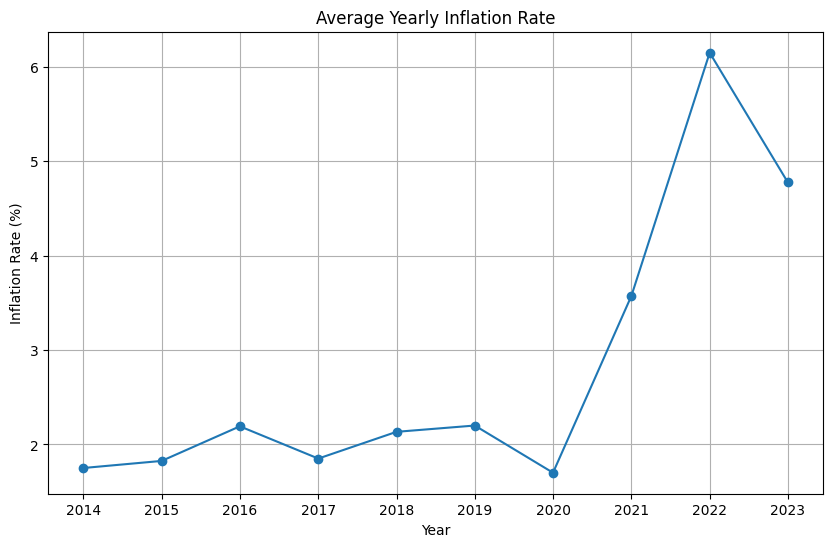

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv("/tmp/tmpco0s0o4_/LOdZoVp1inflation.csv")

# Extract the year and inflation rate from the CSV file
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df = df.rename(
    columns={
        "Jan": "Jan Rate",
        "Feb": "Feb Rate",
        "Mar": "Mar Rate",
        "Apr": "Apr Rate",
        "May": "May Rate",
        "Jun": "Jun Rate",
        "Jul": "Jul Rate",
        "Aug": "Aug Rate",
        "Sep": "Sep Rate",
        "Oct": "Oct Rate",
        "Nov": "Nov Rate",
        "Dec": "Dec Rate",
    }
)

# Calculate the average yearly inflation rate
df["Yearly Inflation"] = df[
    [
        "Jan Rate",
        "Feb Rate",
        "Mar Rate",
        "Apr Rate",
        "May Rate",
        "Jun Rate",
        "Jul Rate",
        "Aug Rate",
        "Sep Rate",
        "Oct Rate",
        "Nov Rate",
        "Dec Rate",
    ]
].mean(axis=1)

# Plot the average yearly inflation rate as a time series
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Yearly Inflation"], marker="o")
plt.title("Average Yearly Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.show()


## 3. Llama Stack Agent Evaluations


#### 3.1. Online Evaluation Dataset Collection Using Telemetry

- Llama Stack offers built-in telemetry to collect traces and data about your agentic application.
- In this example, we will show how to build an Agent with Llama Stack, and query the agent's traces into an online dataset that can be used for evaluation.  

##### 🚧 Patches 🚧
- The following cells are temporary patches to get `telemetry` working.

In [ ]:
# need to install on latest main
!pip uninstall llama-stack
!pip install git+https://github.com/meta-llama/llama-stack.git@main

Found existing installation: llama_stack 0.0.61
Uninstalling llama_stack-0.0.61:
  Would remove:
    /usr/local/bin/install-wheel-from-presigned
    /usr/local/bin/llama
    /usr/local/lib/python3.10/dist-packages/llama_stack-0.0.61.dist-info/*
    /usr/local/lib/python3.10/dist-packages/llama_stack/*
Proceed (Y/n)? Y
  Successfully uninstalled llama_stack-0.0.61
  Cloning https://github.com/meta-llama/llama-stack.git (to revision main) to /tmp/pip-req-build-oryyzdm1
  Running command git clone --filter=blob:none --quiet https://github.com/meta-llama/llama-stack.git /tmp/pip-req-build-oryyzdm1
  Resolved https://github.com/meta-llama/llama-stack.git to commit 53b3a1e345c46d7d37c1af3d675092a4cbfe85f9
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for llama_stack: filename=llama_stack-0.0.61-py3-none-any.whl size=464145 sha25

In [ ]:
# disable logging for clean server logs
import logging


def remove_root_handlers():
    root_logger = logging.getLogger()
    for handler in root_logger.handlers[:]:
        root_logger.removeHandler(handler)
        print(f"Removed handler {handler.__class__.__name__} from root logger")


remove_root_handlers()


Removed handler StreamHandler from root logger


##### 3.1.1. Building a Search Agent

In [ ]:
from google.colab import userdata
from llama_stack_client.lib.agents.agent import Agent
from llama_stack_client.lib.agents.event_logger import EventLogger
from llama_stack_client.types.agent_create_params import AgentConfig

agent_config = AgentConfig(
    model="meta-llama/Llama-3.1-405B-Instruct",
    instructions="You are a helpful assistant. Use search tool to answer the questions. ",
    tools=(
        [
            {
                "type": "brave_search",
                "engine": "tavily",
                "api_key": userdata.get("TAVILY_SEARCH_API_KEY"),
            }
        ]
    ),
    input_shields=[],
    output_shields=[],
    enable_session_persistence=False,
)
agent = Agent(client, agent_config)
user_prompts = [
    "Which teams played in the NBA western conference finals of 2024",
    "In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.",
    "What is the British-American kickboxer Andrew Tate's kickboxing name?",
]

session_id = agent.create_session("test-session")

for prompt in user_prompts:
    response = agent.create_turn(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        session_id=session_id,
    )

    for log in EventLogger().log(response):
        log.print()


inference> Let me check the latest sports news.
inference> bravy_search.call(query="Bill Cosby South Park episode")
CustomTool> Unknown tool `bravy_search` was called.
inference> brave_search.call(query="Andrew Tate kickboxing name")
tool_execution> Tool:brave_search Args:{'query': 'Andrew Tate kickboxing name'}
tool_execution> Tool:brave_search Response:{"query": "Andrew Tate kickboxing name", "top_k": [{"title": "Andrew Tate kickboxing record: How many championships ... - FirstSportz", "url": "https://firstsportz.com/mma-how-many-championships-does-andrew-tate-have/", "content": "Andrew Tate's Kickboxing career. During his kickboxing career, he used the nickname \"King Cobra,\" which he currently uses as his Twitter name. Tate had an unorthodox style of movement inside the ring. He kept his hands down most of the time and relied on quick jabs and an overhand right to land significant strikes.", "score": 0.9996244, "raw_content": null}, {"title": "Andrew Tate: Kickboxing Record, Facts

##### 3.1.2 Query Telemetry

In [ ]:
print(f"Getting traces for session_id={session_id}")
import json

from rich.pretty import pprint

agent_logs = []

for span in client.telemetry.query_spans(
    attribute_filters=[
        {"key": "session_id", "op": "eq", "value": session_id},
    ],
    attributes_to_return=["input", "output"],
):
    if span.attributes["output"] != "no shields":
        agent_logs.append(span.attributes)

pprint(agent_logs)


Getting traces for session_id=ac651ce8-2281-47f2-8814-ef947c066e40


[
│   {
│   │   'input': [
│   │   │   '{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}',
│   │   │   '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}'
│   │   ],
│   │   'output': 'content: Let me check the latest sports news. tool_calls: []'
│   },
│   {
│   │   'input': [
│   │   │   '{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}',
│   │   │   '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}',
│   │   │   '{"role":"assistant","content":"Let me check the latest sports news.","stop_reason":"end_of_turn","tool_calls":[]}',
│   │   │   '{"role":"user","content":"In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.","context":null}'
│   │   ],
│   │   'output': "content:  tool_calls: [ToolCall(call_id='19bd3554-e670-4856-89d0-c63f5b016245', tool_name='bravy_search', arguments={'query': 'Bill Cosby South Park episode'})]"
│   },
│   {
│   │   'input': [
│   │   │   '{"role":"system","content":"You are a helpful assistant. Use search tool to answer the questions. "}',
│   │   │   '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}',
│   │   │   '{"role":"assistant","content":"Let me check the latest sports news.","stop_reason":"end_of_turn","tool_calls":[]}',
│   │   │   '{"role":"user","content":"In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.","context":null}',
│   │   │   '{"role":"assistant","content":"","stop_reason":"end_of_turn","tool_calls":[{"call_id":"19bd3554-e670-4856-89d0-c63f5b016245","tool_name":"bravy_search","arguments":{"query":"Bill Cosby South Park episode"}}]}',
│   │   │   '{"role":"user","content":"What is the British-American kickboxer Andrew Tate\'s kickboxing name?","context":null}'
│   │   ],
│   │   'output': "content:  tool_calls: [ToolCall(call_id='526045a7-5f51-40fb-ba97-5ad29610e511', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'Andrew Tate kickboxing name'})]"
│   },
│   {
│   │   'input': '{"role":"assistant","content":"","stop_reason":"end_of_turn","tool_calls":[{"call_id":"526045a7-5f51-40fb-ba97-5ad29610e511","tool_name":"brave_search","arguments":{"query":"Andrew Tate kickboxing name"}}]}',
│   │   'output': '{"role":"ipython","call_id":"526045a7-5f51-40fb-ba97-5ad29610e511","tool_name":"brave_search","content":"{\\"query\\": \\"Andrew Tate kickboxing name\\", \\"top_k\\": [{\\"title\\": \\"Andrew Tate kickboxing record: How many championships ... - FirstSportz\\", \\"url\\": \\"https://firstsportz.com/mma-how-many-championships-does-andrew-tate-have/\\", \\"content\\": \\"Andrew Tate\'s Kickboxing career. During his kickboxing career, he used the nickname \\\\\\"King Cobra,\\\\\\" which he currently uses as his Twitter name. Tate had an unorthodox style of movement inside the ring. He kept his hands down most of the time and relied on quick jabs and an overhand right to land significant strikes.\\", \\"score\\": 0.9996244, \\"raw_content\\": null}, {\\"title\\": \\"Andrew Tate: Kickboxing Record, Facts, Height, Weight, Age, Biography\\", \\"url\\": \\"https://www.lowkickmma.com/andrew-tate-kickboxing-record-facts-height-weight-age-biography/\\", \\"content\\": \\"Birth Name: Emory Andrew Tate III: Date of Birth: 1 December 1986: Place of Birth: Washington, D.C., U.S. ... In his professional kickboxing career, Andrew Tate won 32 of his fights by knockout.\\", \\"score\\": 0.99909246, \\"raw_content\\": null}, {\\"title\\": \\"Who is Andrew Tate? MMA, kickboxing record and controversies of fighter ...\\", \\"url\\": \\"https://www.sportingnews.com/us/kickboxing/news/andrew-tate-mma-kickboxing-record-controversies/u50waalc9cfz7krjg9wnyb7p\\", \\"content\\": \\"Andrew T

##### 3.1.3 Post-Process Telemetry Results & Evaluate

- Now, we want to run evaluation to assert that our search agent succesfully calls brave_search from online traces.
- We will first post-process the agent's telemetry logs and run evaluation.

In [ ]:
# post-process telemetry spance and prepare data for eval
# in this case, we want to assert that all user prompts is followed by a tool call
import ast
import json

eval_rows = []

for log in agent_logs:
    last_msg = log["input"][-1]
    if '"role":"user"' in last_msg:
        eval_rows.append(
            {
                "input_query": last_msg,
                "generated_answer": log["output"],
                # check if generated_answer uses tools brave_search
                "expected_answer": "brave_search",
            },
        )

pprint(eval_rows)
scoring_params = {
    "basic::subset_of": None,
}
scoring_response = client.scoring.score(
    input_rows=eval_rows, scoring_functions=scoring_params
)
pprint(scoring_response)


[
│   {
│   │   'input_query': '{"role":"user","content":"Which teams played in the NBA western conference finals of 2024","context":null}',
│   │   'generated_answer': 'content: Let me check the latest sports news. tool_calls: []',
│   │   'expected_answer': 'brave_search'
│   },
│   {
│   │   'input_query': '{"role":"user","content":"In which episode and season of South Park does Bill Cosby (BSM-471) first appear? Give me the number and title.","context":null}',
│   │   'generated_answer': "content:  tool_calls: [ToolCall(call_id='19bd3554-e670-4856-89d0-c63f5b016245', tool_name='bravy_search', arguments={'query': 'Bill Cosby South Park episode'})]",
│   │   'expected_answer': 'brave_search'
│   },
│   {
│   │   'input_query': '{"role":"user","content":"What is the British-American kickboxer Andrew Tate\'s kickboxing name?","context":null}',
│   │   'generated_answer': "content:  tool_calls: [ToolCall(call_id='526045a7-5f51-40fb-ba97-5ad29610e511', tool_name=<BuiltinTool.brave_search: 'brave_search'>, arguments={'query': 'Andrew Tate kickboxing name'})]",
│   │   'expected_answer': 'brave_search'
│   }
]

ScoringScoreResponse(
│   results={
│   │   'basic::subset_of': ScoringResult(
│   │   │   aggregated_results={'accuracy': {'accuracy': 0.3333333333333333, 'num_correct': 1.0, 'num_total': 3}},
│   │   │   score_rows=[{'score': 0.0}, {'score': 0.0}, {'score': 1.0}]
│   │   )
│   }
)

#### 3.2. Agentic Application Dataset Scoring
- Llama Stack offers a library of scoring functions and the `/scoring` API, allowing you to run evaluations on your pre-annotated AI application datasets.

- In this example, we will work with an example RAG dataset you have built previously, label with an annotation, and use LLM-As-Judge with custom judge prompt for scoring. Please checkout our [Llama Stack Playground](https://llama-stack.readthedocs.io/en/latest/playground/index.html) for an interactive interface to upload datasets and run scorings.

In [ ]:
import rich
from rich.pretty import pprint

judge_model_id = "meta-llama/Llama-3.1-405B-Instruct-FP8"

JUDGE_PROMPT = """
Given a QUESTION and GENERATED_RESPONSE and EXPECTED_RESPONSE.

Compare the factual content of the GENERATED_RESPONSE with the EXPECTED_RESPONSE. Ignore any differences in style, grammar, or punctuation.
  The GENERATED_RESPONSE may either be a subset or superset of the EXPECTED_RESPONSE, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
  (A) The GENERATED_RESPONSE is a subset of the EXPECTED_RESPONSE and is fully consistent with it.
  (B) The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it.
  (C) The GENERATED_RESPONSE contains all the same details as the EXPECTED_RESPONSE.
  (D) There is a disagreement between the GENERATED_RESPONSE and the EXPECTED_RESPONSE.
  (E) The answers differ, but these differences don't matter from the perspective of factuality.

Give your answer in the format "Answer: One of ABCDE, Explanation: ".

Your actual task:

QUESTION: {input_query}
GENERATED_RESPONSE: {generated_answer}
EXPECTED_RESPONSE: {expected_answer}
"""

input_query = (
    "What are the top 5 topics that were explained? Only list succinct bullet points."
)
generated_answer = """
Here are the top 5 topics that were explained in the documentation for Torchtune:

* What is LoRA and how does it work?
* Fine-tuning with LoRA: memory savings and parameter-efficient finetuning
* Running a LoRA finetune with Torchtune: overview and recipe
* Experimenting with different LoRA configurations: rank, alpha, and attention modules
* LoRA finetuning
"""
expected_answer = """LoRA"""

rows = [
    {
        "input_query": input_query,
        "generated_answer": generated_answer,
        "expected_answer": expected_answer,
    },
]

scoring_params = {
    "llm-as-judge::base": {
        "judge_model": judge_model_id,
        "prompt_template": JUDGE_PROMPT,
        "type": "llm_as_judge",
        "judge_score_regexes": ["Answer: (A|B|C|D|E)"],
    },
    "basic::subset_of": None,
}

response = client.scoring.score(input_rows=rows, scoring_functions=scoring_params)
pprint(response)


ScoringScoreResponse(
│   results={
│   │   'llm-as-judge::base': ScoringResult(
│   │   │   aggregated_results={},
│   │   │   score_rows=[
│   │   │   │   {
│   │   │   │   │   'score': 'B',
│   │   │   │   │   'judge_feedback': 'Answer: B, Explanation: The GENERATED_RESPONSE is a superset of the EXPECTED_RESPONSE and is fully consistent with it. The GENERATED_RESPONSE provides more detailed information about the top 5 topics related to LoRA, while the EXPECTED_RESPONSE only mentions "LoRA". The GENERATED_RESPONSE expands on the topic, but does not conflict with the EXPECTED_RESPONSE.'
│   │   │   │   }
│   │   │   ]
│   │   ),
│   │   'basic::subset_of': ScoringResult(
│   │   │   aggregated_results={'accuracy': 1.0, 'num_correct': 1.0, 'num_total': 1.0},
│   │   │   score_rows=[{'score': 1.0}]
│   │   )
│   }
)